C:\Users\harsh\AppData\Local\Temp\ipykernel_10688\3142778239.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_resampled = data['average_price'].resample('M').mean()
C:\Users\harsh\AppData\Local\Temp\ipykernel_10688\3142778239.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_resampled = monthly_resampled.fillna(method='ffill')


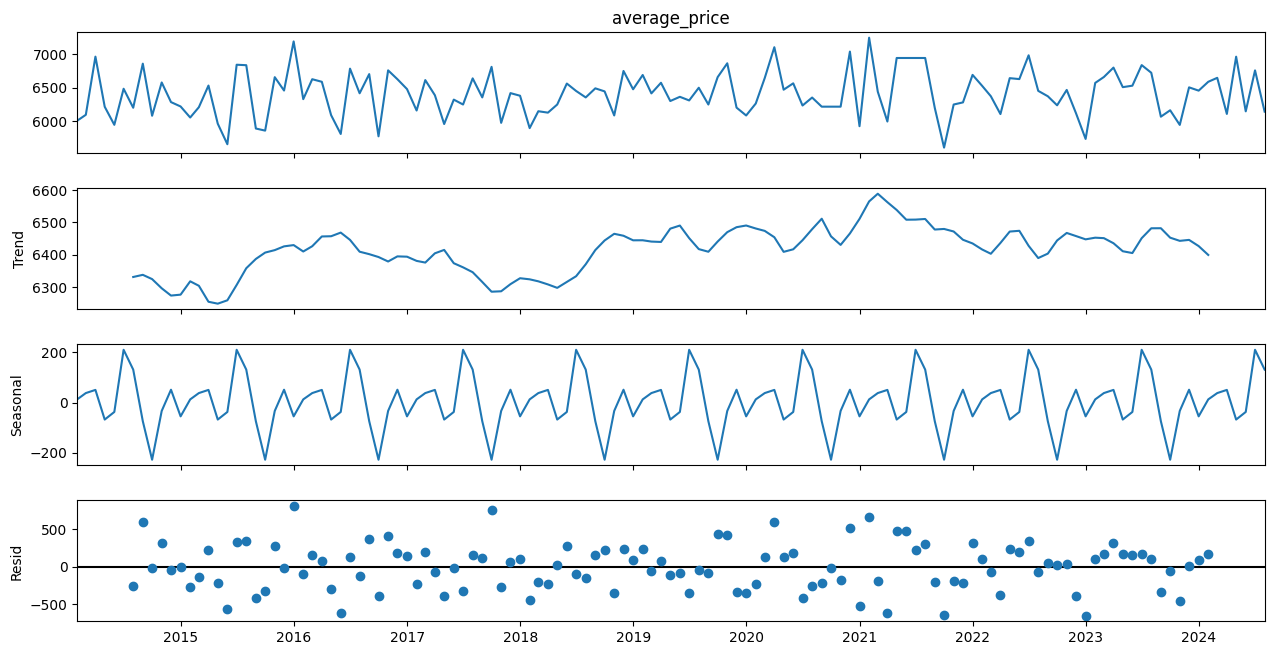

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
data = pd.read_csv(r'C:\Users\harsh\tscrape\apple_cleaned.csv')

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract month and year from the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

# Calculate the average price for each day
data['average_price'] = data[['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)']].mean(axis=1)

# Set the date column as the index
data.set_index('date', inplace=True)

# Resample the data to get monthly average prices
monthly_resampled = data['average_price'].resample('M').mean()

# Fill missing values (using forward fill method as an example)
monthly_resampled = monthly_resampled.fillna(method='ffill')

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_resampled, model='additive')
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()


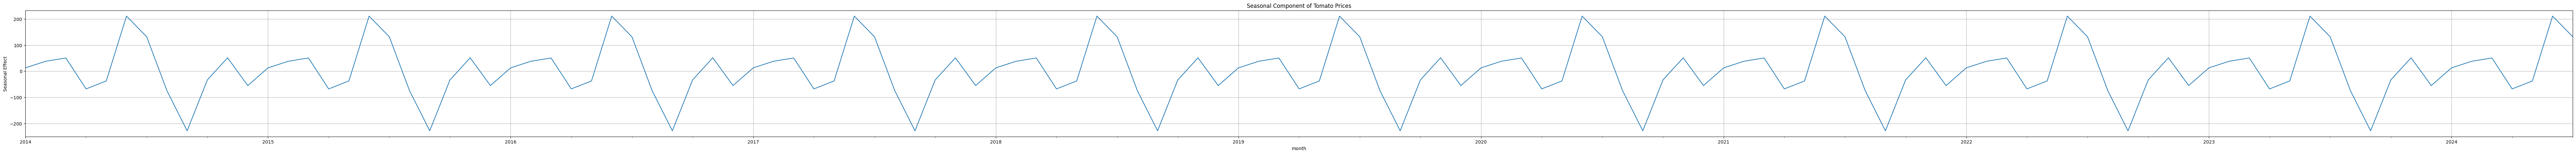

In [ ]:
# Extract the seasonal component
seasonal_component = decomposition.seasonal

# Plot the seasonal component
plt.figure(figsize=(100, 5))
seasonal_component.plot()
plt.title('Seasonal Component of Tomato Prices')
plt.xlabel('month')
plt.ylabel('Seasonal Effect')
plt.grid(True)
plt.show()


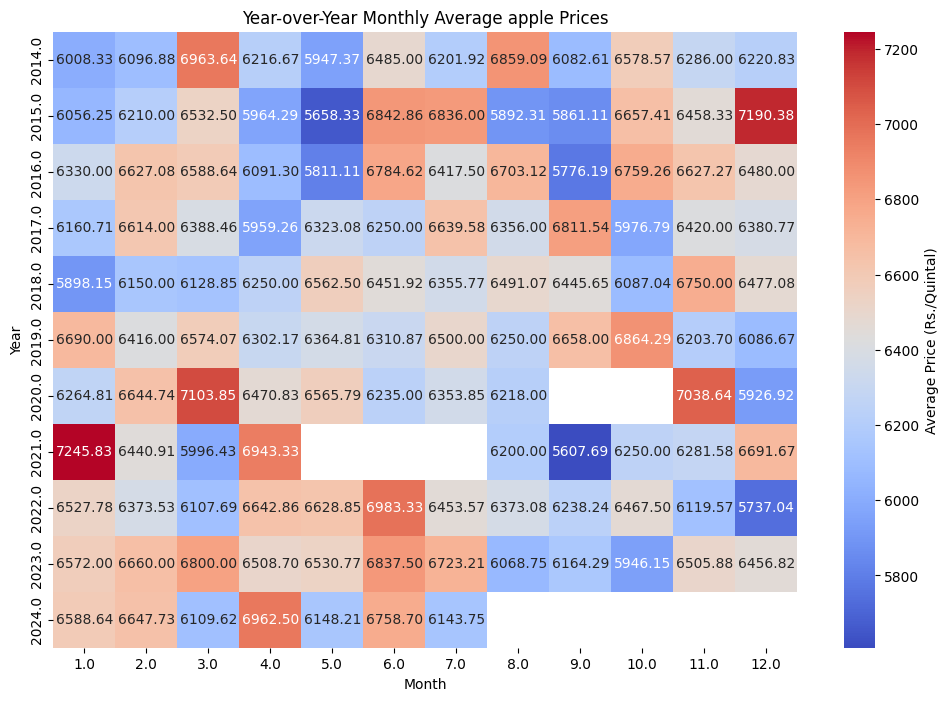

In [ ]:
import seaborn as sns

# Pivot the data for heatmap
pivot_table = data.pivot_table(values='average_price', index='year', columns='month', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average Price (Rs./Quintal)'})
plt.title('Year-over-Year Monthly Average apple Prices')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


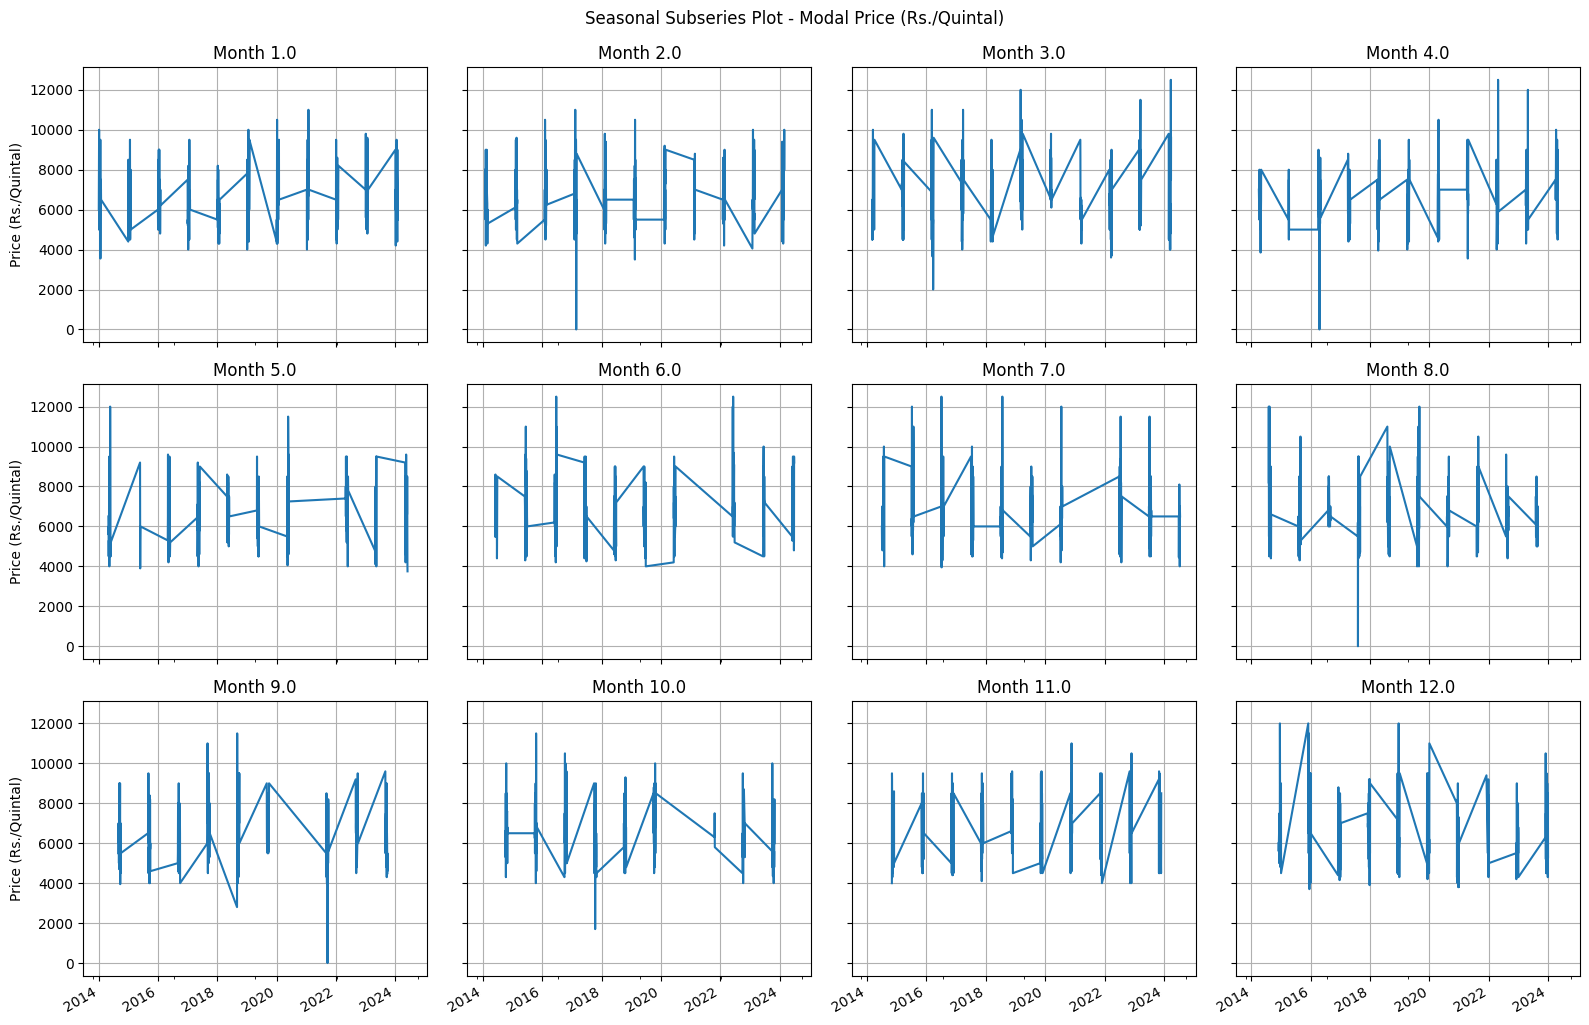

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Group by month and create a seasonal subseries plot
fig, axes = plt.subplots(3, 4, figsize=(16, 10), sharex=True, sharey=True)  # 3 rows x 4 columns for each month

for i, (month, data) in enumerate(data.groupby(data.index.month)):
    ax = axes[i // 4, i % 4]
    data['Modal Price (Rs./Quintal)'].plot(ax=ax)
    ax.set_title(f'Month {month}')
    ax.set_xlabel('')
    ax.set_ylabel('Price (Rs./Quintal)')
    ax.grid(True)

plt.tight_layout()
plt.suptitle('Seasonal Subseries Plot - Modal Price (Rs./Quintal)', y=1.02)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Assuming df is your DataFrame and decomposition is already done
# Extract the seasonal component
seasonal_component = decomposition.seasonal

# Plot the seasonal component
plt.figure(figsize=(200, 50))  # Adjust the figure size as needed
plt.plot(seasonal_component, label='Seasonal Component', color='blue', linewidth=4.5)


# Set x-axis major locator to months and format the date
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%Y'))

plt.title('Seasonal Component of Tomato Prices')
plt.xlabel('Month')
plt.ylabel('Seasonal Effect')
plt.grid(True)
plt.legend()

plt.show()


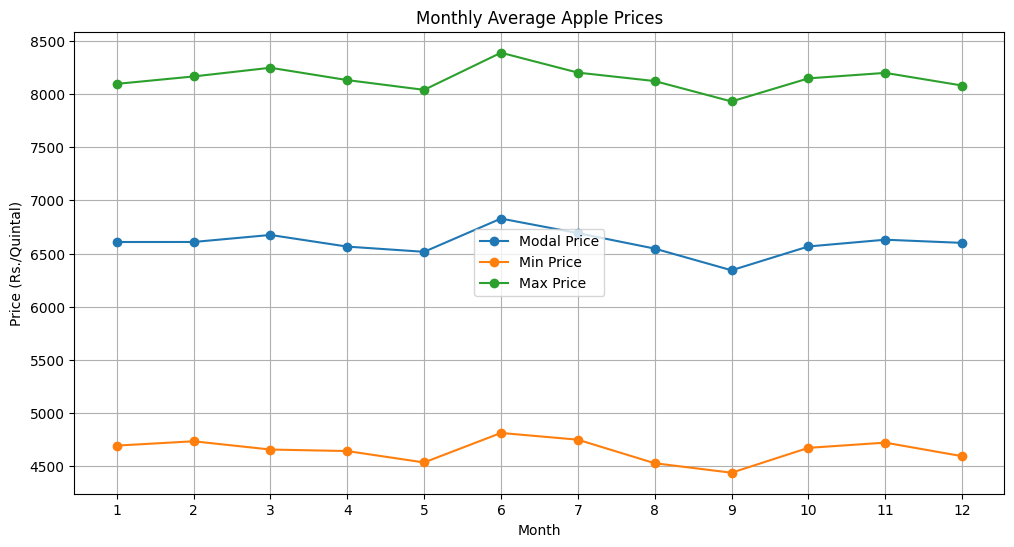

In [ ]:
file  = 'apple_cleaned.csv'
df = pd.read_csv(file)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with missing 'date'
df = df.dropna(subset=['date'])

# Extract month and year from 'date'
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Group by month and calculate the mean prices
monthly_avg_prices = df.groupby('month')[['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)', 'Modal Price (Rs./Quintal)']].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_prices.index, monthly_avg_prices['Modal Price (Rs./Quintal)'], marker='o', linestyle='-', label='Modal Price')
plt.plot(monthly_avg_prices.index, monthly_avg_prices['Min Price (Rs./Quintal)'], marker='o', linestyle='-', label='Min Price')
plt.plot(monthly_avg_prices.index, monthly_avg_prices['Max Price (Rs./Quintal)'], marker='o', linestyle='-', label='Max Price')
plt.title('Monthly Average Apple Prices')
plt.xlabel('Month')
plt.ylabel('Price (Rs./Quintal)')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()


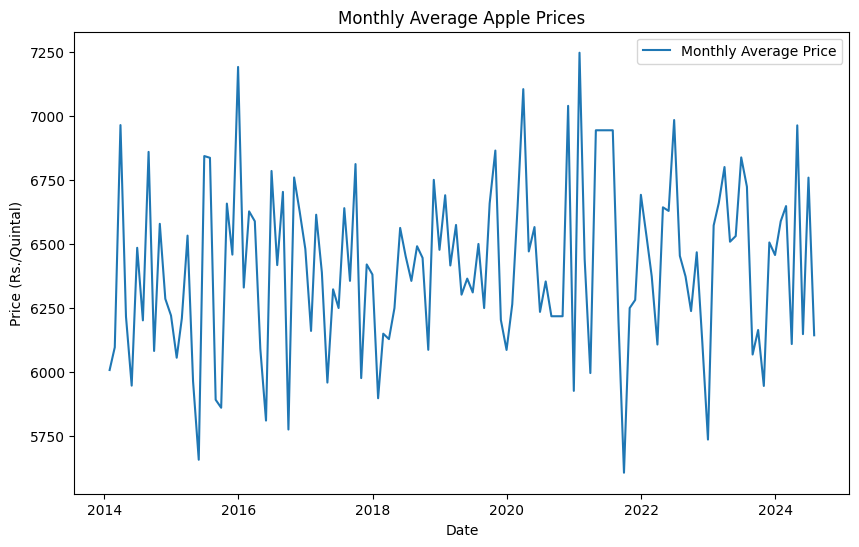

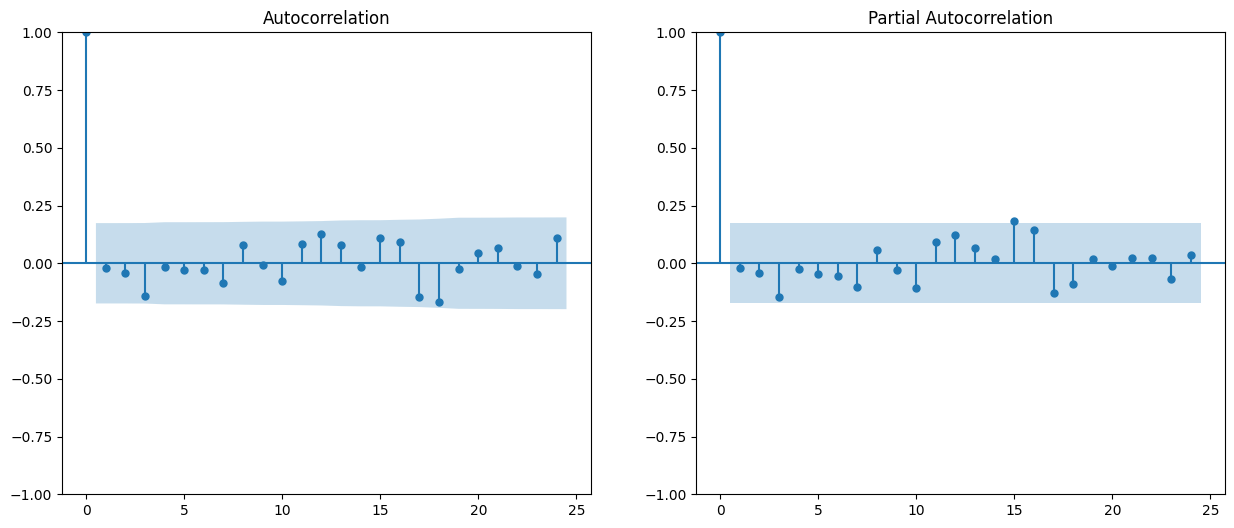

                               SARIMAX Results                                
Dep. Variable:          average_price   No. Observations:                  127
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -914.065
Date:                Wed, 24 Jul 2024   AIC                           1840.129
Time:                        07:33:15   BIC                           1857.195
Sample:                    01-31-2014   HQIC                          1847.063
                         - 07-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6413.0812     23.545    272.374      0.000    6366.934    6459.229
ar.L1          1.7679      0.049     36.076      0.000       1.672       1.864
ar.L2         -0.9120      0.054    -16.827      0.0

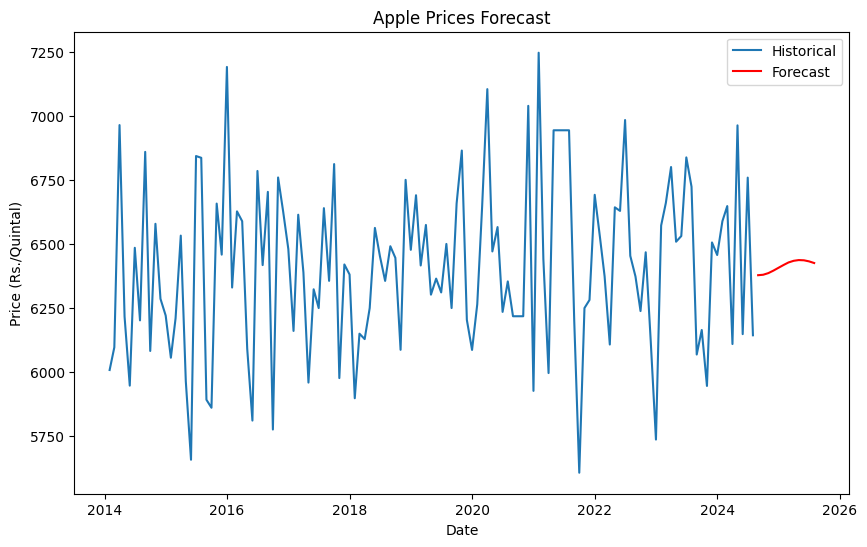

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

# Load the data
data1 = pd.read_csv(r'C:\Users\harsh\tscrape\apple_cleaned.csv')
data1['date'] = pd.to_datetime(data1['date'])
data1.set_index('date', inplace=True)

# Calculate the average price for each day
data1['average_price'] = data1[['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)']].mean(axis=1)

# Resample the data to get monthly average prices
monthly_resampled = data1['average_price'].resample('M').mean()
monthly_resampled = monthly_resampled.fillna(method='ffill')

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_resampled, label='Monthly Average Price')
plt.title('Monthly Average Apple Prices')
plt.xlabel('Date')
plt.ylabel('Price (Rs./Quintal)')
plt.legend()
plt.show()

# Plot ACF and PACF to identify parameters
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_acf(monthly_resampled, lags=24, ax=axes[0])
plot_pacf(monthly_resampled, lags=24, ax=axes[1])
plt.show()

# Fit ARIMA model
model = ARIMA(monthly_resampled, order=(2, 0, 2))  # Example order, you might need to adjust (p, d, q)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast the future values
forecast_steps = 12  # Forecasting 12 months ahead
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_resampled, label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Apple Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Price (Rs./Quintal)')
plt.legend()
plt.show()


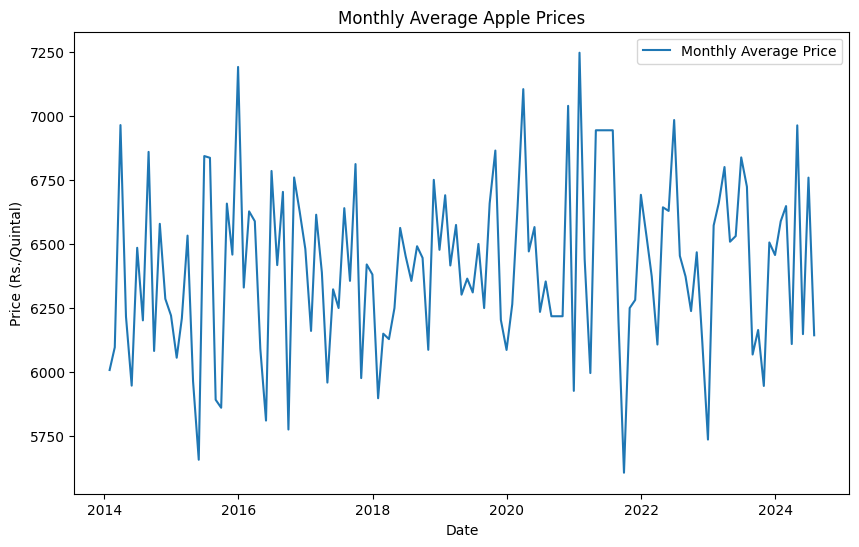

SARIMA(0, 0, 0)x(0, 0, 0, 12) MSE=41604868.95333675
SARIMA(0, 0, 0)x(0, 0, 1, 12) MSE=11566550.546663884
SARIMA(0, 0, 0)x(0, 1, 0, 12) MSE=174897.23884704564
SARIMA(0, 0, 0)x(0, 1, 1, 12) MSE=105738.3313814594
SARIMA(0, 0, 0)x(1, 0, 0, 12) MSE=173921.24870532253
SARIMA(0, 0, 0)x(1, 0, 1, 12) MSE=82492.4136937544
SARIMA(0, 0, 0)x(1, 1, 0, 12) MSE=125404.70281944353
SARIMA(0, 0, 0)x(1, 1, 1, 12) MSE=107280.32093610108
SARIMA(0, 0, 1)x(0, 0, 0, 12) MSE=11120315.542814251
SARIMA(0, 0, 1)x(0, 0, 1, 12) MSE=4556809.872103267
SARIMA(0, 0, 1)x(0, 1, 0, 12) MSE=176184.08523309563
SARIMA(0, 0, 1)x(0, 1, 1, 12) MSE=104057.80196805336
SARIMA(0, 0, 1)x(1, 0, 0, 12) MSE=924463.2603020229
SARIMA(0, 0, 1)x(1, 1, 0, 12) MSE=126243.32993561844
SARIMA(0, 0, 1)x(1, 1, 1, 12) MSE=104870.76470420338
SARIMA(0, 0, 2)x(0, 0, 0, 12) MSE=5235045.032982052
SARIMA(0, 0, 2)x(0, 0, 1, 12) MSE=3457661.820809591
SARIMA(0, 0, 2)x(0, 1, 0, 12) MSE=176304.44075414664
SARIMA(0, 0, 2)x(0, 1, 1, 12) MSE=102439.32949162305
S

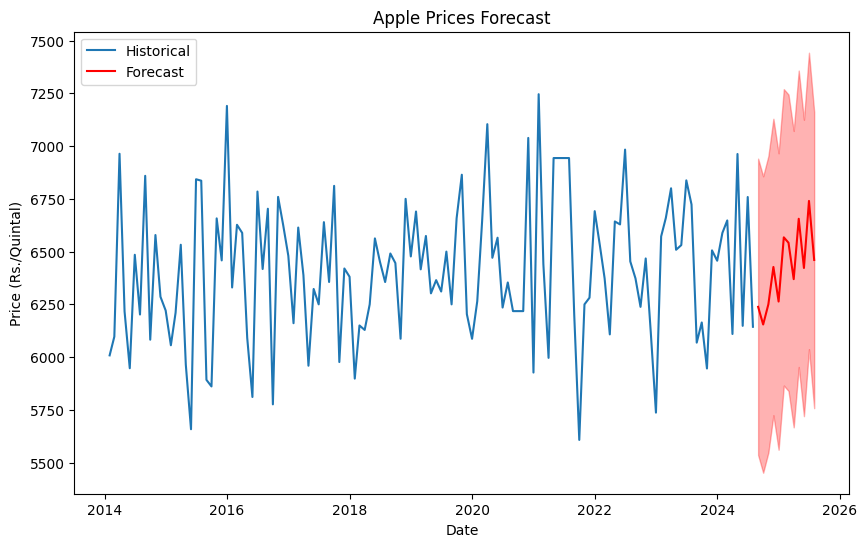

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools
import warnings
warnings.filterwarnings('ignore')

def evaluate_sarima_model(X, arima_order, seasonal_order):
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = SARIMAX(history, order=arima_order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    error = mean_squared_error(test, predictions)
    return error

def grid_search_sarima(data, p_values, d_values, q_values, P_values, D_values, Q_values, m):
    best_score, best_cfg, best_seasonal_cfg = float("inf"), None, None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            order = (p, d, q)
                            seasonal_order = (P, D, Q, m)
                            try:
                                mse = evaluate_sarima_model(data, order, seasonal_order)
                                if mse < best_score:
                                    best_score, best_cfg, best_seasonal_cfg = mse, order, seasonal_order
                                print(f'SARIMA{order}x{seasonal_order} MSE={mse}')
                            except:
                                continue
    print(f'Best SARIMA{best_cfg}x{best_seasonal_cfg} MSE={best_score}')
    return best_cfg, best_seasonal_cfg

# Load the data
data5 = pd.read_csv(r'C:\Users\harsh\tscrape\apple_cleaned.csv')
data5['date'] = pd.to_datetime(data5['date'])
data5.set_index('date', inplace=True)

# Calculate the average price for each day
data5['average_price'] = data5[['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)']].mean(axis=1)

# Resample the data to get monthly average prices
monthly_resampled = data5['average_price'].resample('M').mean()
monthly_resampled = monthly_resampled.fillna(method='ffill')

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_resampled, label='Monthly Average Price')
plt.title('Monthly Average Apple Prices')
plt.xlabel('Date')
plt.ylabel('Price (Rs./Quintal)')
plt.legend()
plt.show()

# Set p, d, q, P, D, Q ranges
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
m = 12  # 12 for monthly data

# Perform grid search
best_order, best_seasonal_order = grid_search_sarima(monthly_resampled, p_values, d_values, q_values, P_values, D_values, Q_values, m)

# Check if a valid model was found
if best_order is None or best_seasonal_order is None:
    raise ValueError("No valid SARIMA model found.")

# Fit the best SARIMA model
model = SARIMAX(monthly_resampled, order=best_order, seasonal_order=best_seasonal_order)
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

# Forecast the future values
forecast_steps = 12  # Forecasting 12 months ahead
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_resampled.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_resampled, label='Historical')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.title('Apple Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Price (Rs./Quintal)')
plt.legend()
plt.show()


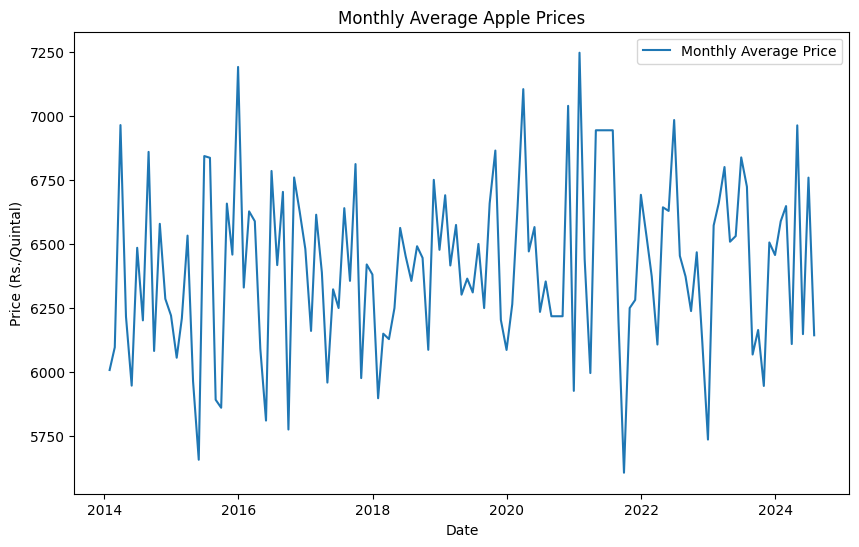

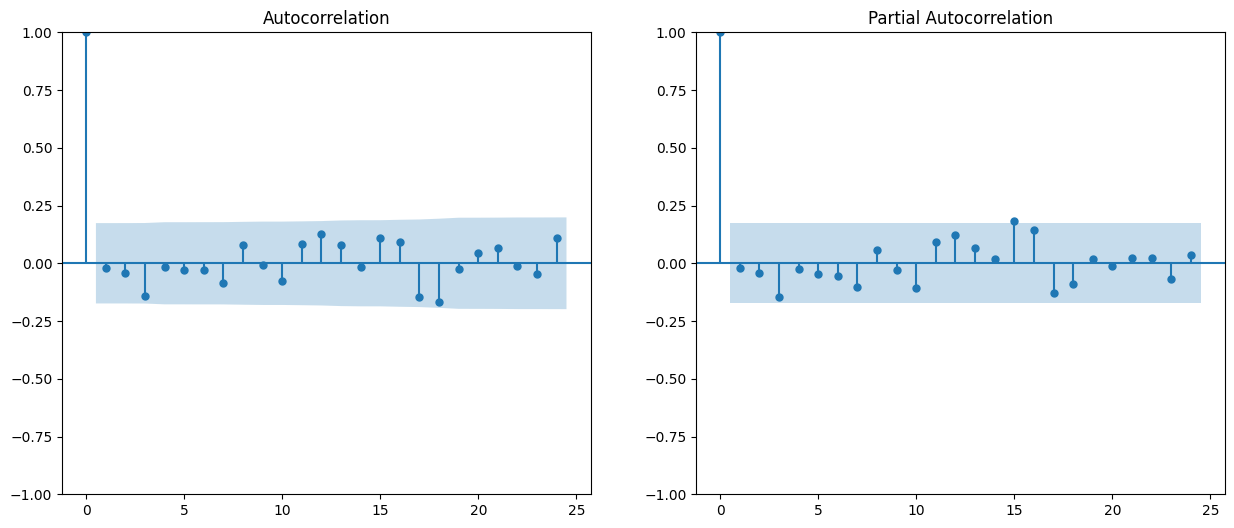

                                 SARIMAX Results                                  
Dep. Variable:              average_price   No. Observations:                  127
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood                -963.843
Date:                    Wed, 24 Jul 2024   AIC                           1933.687
Time:                            13:16:48   BIC                           1942.220
Sample:                        01-31-2014   HQIC                          1937.154
                             - 07-31-2024                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9999      0.001   1735.816      0.000       0.999       1.001
ma.S.L12      -0.6902      0.098     -7.026      0.000      -0.883      -0.498
sigma2      1.284e+0

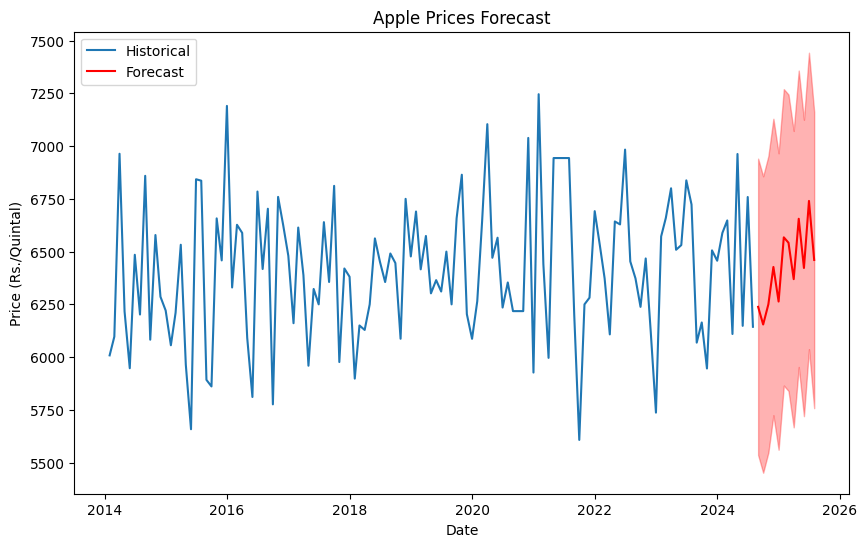

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

# Load the data
data5 = pd.read_csv(r'C:\Users\harsh\tscrape\apple_cleaned.csv')
data5['date'] = pd.to_datetime(data5['date'])
data5.set_index('date', inplace=True)

# Calculate the average price for each day
data5['average_price'] = data5[['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)']].mean(axis=1)

# Resample the data to get monthly average prices
monthly_resampled = data5['average_price'].resample('M').mean()
monthly_resampled = monthly_resampled.fillna(method='ffill')

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_resampled, label='Monthly Average Price')
plt.title('Monthly Average Apple Prices')
plt.xlabel('Date')
plt.ylabel('Price (Rs./Quintal)')
plt.legend()
plt.show()

# Plot ACF and PACF to identify parameters
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_acf(monthly_resampled, lags=24, ax=axes[0])
plot_pacf(monthly_resampled, lags=24, ax=axes[1])
plt.show()

# Fit SARIMA model
# Example SARIMA order (p, d, q) and seasonal order (P, D, Q, s)
# You might need to adjust these parameters based on your data and seasonal patterns
model = SARIMAX(monthly_resampled,
                order=(0, 0, 0),  # ARIMA order (p, d, q)
                seasonal_order=(1, 0, 1, 12))  # Seasonal order (P, D, Q, s); s=12 for monthly data
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast the future values
forecast_steps = 12  # Forecasting 12 months ahead
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_resampled.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_resampled, label='Historical')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.title('Apple Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Price (Rs./Quintal)')
plt.legend()
plt.show()


Forecasted Values with Confidence Intervals:
               Forecast     Lower CI     Upper CI
2024-08-31  6238.210799  5535.898373  6940.523225
2024-09-30  6154.586621  5452.274195  6856.899047
2024-10-31  6250.296047  5547.983621  6952.608473
2024-11-30  6427.137652  5724.825226  7129.450078
2024-12-31  6263.433522  5561.121096  6965.745948
2025-01-31  6567.590105  5865.335531  7269.844678
2025-02-28  6541.895649  5839.641075  7244.150223
2025-03-31  6369.479877  5667.225303  7071.734451
2025-04-30  6655.580990  5953.326416  7357.835563
2025-05-31  6422.471993  5720.217420  7124.726567
2025-06-30  6740.127459  6037.872885  7442.382033
2025-07-31  6460.372699  5758.118125  7162.627273


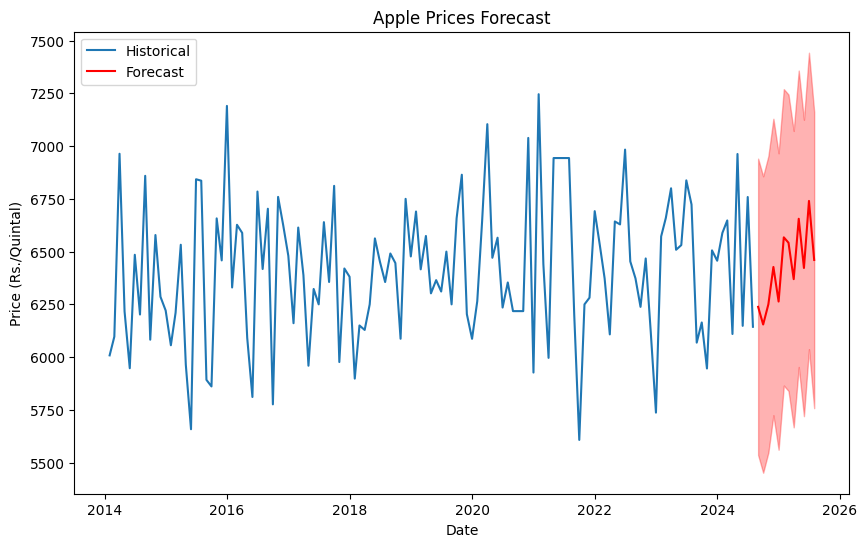

In [6]:
forecast_steps = 12  # Forecasting 12 months ahead
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=monthly_resampled.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Print forecasted values
forecast_df = pd.DataFrame({
    'Forecast': forecast_mean,
    'Lower CI': forecast_conf_int.iloc[:, 0],
    'Upper CI': forecast_conf_int.iloc[:, 1]
}, index=forecast_index)
print("Forecasted Values with Confidence Intervals:")
print(forecast_df)
plt.figure(figsize=(10, 6))
plt.plot(monthly_resampled, label='Historical')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.title('Apple Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Price (Rs./Quintal)')
plt.legend()
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print("1. ADF Statistic: ", dftest[0])
    print("2. P-Value: ", dftest[1])
    print("3. Number of Lags Used: ", dftest[2])
    print("4. Number of Observations Used For ADF Regression: ", dftest[3])
    print("5. Critical Values:")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

# Assuming 'monthly_resampled' is your dataset
ad_test(monthly_resampled)


1. ADF Statistic:  -11.39113759986653
2. P-Value:  8.062764537995088e-21
3. Number of Lags Used:  0
4. Number of Observations Used For ADF Regression:  126
5. Critical Values:
	 1% :  -3.4833462346078936
	 5% :  -2.8847655969877666
	 10% :  -2.5791564575459813


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    error = mean_squared_error(test, predictions)
    return error
def grid_search_arima(data, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = evaluate_arima_model(data, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print(f'ARIMA{order} MSE={mse}')
                except:
                    continue
    print(f'Best ARIMA{best_cfg} MSE={best_score}')
    return best_cfg  # Return the best configuration


# Set p, d, q ranges
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
best_order = grid_search_arima(monthly_resampled, p_values, d_values, q_values)

if best_order is None:
    raise ValueError("No valid ARIMA model found.")

# Fit the best ARIMA model
model = ARIMA(monthly_resampled, order=best_order)
model_fit = model.fit()

# Perform grid search
best_order = grid_search_arima(monthly_resampled, p_values, d_values, q_values)

# Fit the best ARIMA model
model = ARIMA(monthly_resampled, order=best_order)
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())


ARIMA(0, 0, 0) MSE=100946.74621842001
ARIMA(0, 0, 1) MSE=102158.84555893751
ARIMA(0, 0, 2) MSE=106021.62712104952
ARIMA(0, 1, 0) MSE=189246.28448668995
ARIMA(0, 1, 1) MSE=102336.55438393424
ARIMA(0, 1, 2) MSE=103060.9645089409
ARIMA(1, 0, 0) MSE=101915.806054135
ARIMA(1, 0, 1) MSE=101230.0486897996
ARIMA(1, 0, 2) MSE=100534.05226870239
ARIMA(1, 1, 0) MSE=133812.46024234974
ARIMA(1, 1, 1) MSE=103403.54760617956
ARIMA(1, 1, 2) MSE=108039.63934745897
ARIMA(2, 0, 0) MSE=105530.41425370748
ARIMA(2, 0, 1) MSE=100397.33520650647
ARIMA(2, 0, 2) MSE=89987.47248170717
ARIMA(2, 1, 0) MSE=142574.42073527022
ARIMA(2, 1, 1) MSE=106332.4806316367
ARIMA(2, 1, 2) MSE=102280.7868119808
Best ARIMA(2, 0, 2) MSE=89987.47248170717
ARIMA(0, 0, 0) MSE=100946.74621842001
ARIMA(0, 0, 1) MSE=102158.84555893751
ARIMA(0, 0, 2) MSE=106021.62712104952
ARIMA(0, 1, 0) MSE=189246.28448668995
ARIMA(0, 1, 1) MSE=102336.55438393424
ARIMA(0, 1, 2) MSE=103060.9645089409
ARIMA(1, 0, 0) MSE=101915.806054135
ARIMA(1, 0, 1) MSE